![google](http://img.technews.tw/wp-content/uploads/2015/09/Google-logo_1.jpg)
**Google** is one of my dream company. I believe lots of data scientists want to join Google, just like me. However, people might wonder what I need to acquire to be qualified to work in Google. I create this kernel to answer this question. And hope you enjoy!



## Dataset Overlook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('job_skills.csv')

In [3]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


## Data Cleaning

In [4]:
# I modify the column name so that I can use df dot column name more easily
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

I'll check if there is any NaN

In [5]:
pd.isnull(df).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
dtype: int64

I'll straightly drop these rows with NaN

In [6]:
df = df.dropna(how='any',axis='rows')

Here, the first thing I want to check is the values_count of each column

In [7]:
df.Company.value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

Ah! Right. I forgot that Youtube is also part of Google. However, for me, working in Youtube is not as appealing as working in Google. But Youtube is still a great company. No offence haha!

In [8]:
# So I drop Youtube
df = df[df.Company != 'YouTube']

In [9]:
df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Partner Sales Engineer, Google Cloud           7
Recruiter                                      7
User Experience Design Intern, Summer 2018     7
Name: Title, dtype: int64

In [10]:
df.Location.value_counts()[:10]

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          68
London, United Kingdom               61
San Francisco, CA, United States     49
Singapore                            39
Sydney, Australia                    31
Tokyo, Japan                         31
Shanghai, China                      27
Name: Location, dtype: int64

In [11]:
df['Country'] = df['Location'].apply(lambda x : x.split(',')[-1])

In [12]:
df.Country.value_counts()[:15]

 United States     607
 Ireland            87
 United Kingdom     61
 Germany            53
Singapore           39
 China              38
 Australia          35
 Japan              31
 Taiwan             30
 India              27
 Switzerland        22
 France             20
 Brazil             15
 Israel             11
 Poland             11
Name: Country, dtype: int64

## Feature Engineering

**Here, I want to extract the year of work experience in each position.**

The challenge is : 

* There might be some positions requiring work experience in different field
* There might be some positions that don't mention work experience at all

In [13]:
# The way to extract year refer to https://www.kaggle.com/niyamatalmass/what-you-need-to-get-a-job-at-google.
# Thanks Niyamat Ullah for such brilliant way. Go check his kernel. It's great!
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
# Fill empty list with [0]
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)
#Then extract maximum in the list to have the work experience requirement
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : max(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

In [14]:
df.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States,2


In [15]:
df.Minimum_years_experience.describe()

count    1212.000000
mean        2.842409
std         3.301640
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        15.000000
Name: Minimum_years_experience, dtype: float64

In [16]:
df.Category.value_counts()[:10]

Sales & Account Management    167
Marketing & Communications    161
Finance                       112
Technical Solutions           100
Business Strategy              92
People Operations              86
User Experience & Design       83
Program Management             72
Partnerships                   58
Product & Customer Support     48
Name: Category, dtype: int64

## <a id="0">Exploratory</a>

In [17]:
pd.set_option('display.max_colwidth', -1)
df.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills.",Singapore,3


Here, I want to extract degree requirement of each rows. Also, the language required for each role.

In [18]:
Degree = ['BA','BS','Bachelor','MBA','Master','PhD']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 890, 'BS': 860, 'Bachelor': 163, 'MBA': 71, 'Master': 80, 'PhD': 8}


In [19]:
degree_requirement = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requirement,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Degree,Count
0,BA,890
1,BS,860
2,Bachelor,163
3,Master,80
4,MBA,71
5,PhD,8


Text(0.5,0,'Count')

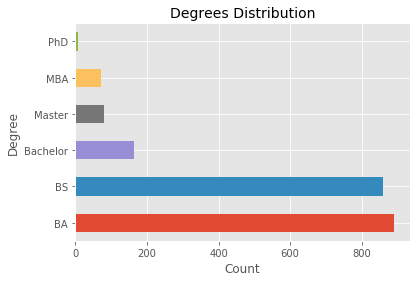

In [20]:
degree.plot.barh(x='Degree',y='Count',legend=False)
plt.title('Degrees Distribution',fontsize=14)
plt.xlabel('Count')

Obviously, most of the positions require basic degree, while some require further education degree, like Master and PhD.

Now, I want to see the distribution of the requiring work experience.

Text(0,0.5,'Years')

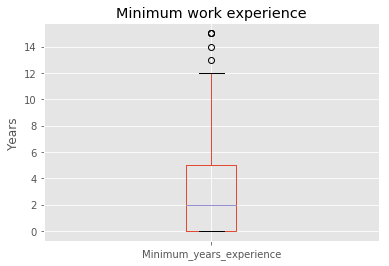

In [21]:
df.Minimum_years_experience.plot(kind='box')
plt.title('Minimum work experience')
plt.ylabel('Years')

Well, obviously, there are few outliers. It must be some real senior positions.

Text(0.5,0.98,'Minimum work experience')

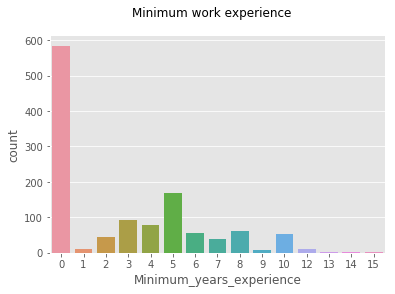

In [22]:
import seaborn as sns
sns.countplot('Minimum_years_experience',data=df)
plt.suptitle('Minimum work experience')

Basically, most of the position didn't mention experience. However, I'll dig deeper later.

In [23]:
Programming_Languages = ['Python', 'Java ','C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL','Go ']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 96, 'Java ': 10, 'C#': 15, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 69, 'Go ': 7}


In [24]:
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,Python,96
1,SQL,69
2,C#,15
3,Ruby,14
4,Java,10
5,PHP,7
6,Go,7
7,Perl,6
8,Javascript,3


Text(0.5,0,'Count')

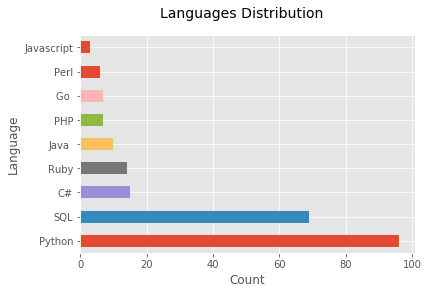

In [25]:
language.plot.barh(x='Language',y='Count',legend=False)
plt.suptitle('Languages Distribution',fontsize=14)
plt.xlabel('Count')

Python, SQL are also important, which indicates that the growing demand of data analysis

## <a id=12>Functions</a>
As a guy on twitter said, " If you write a code more than three times, write a function instead." I'm here to define the functions that I'm going to use in the next few sections

In [26]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

G = np.array(Image.open('img_2241.png'))

In [27]:
def MadeWordCloud(title,text):
    # title as the name of position you want to look up
    # text as which column you want to extract from
    df_subset = df.loc[df.Title.str.contains(title).fillna(False)]
    # subset those rows with corresponded title
    long_text = ' '.join(df_subset[text].tolist())
    # put all text into one long string
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    wordcloud = WordCloud(mask=G,background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()

### Here, I want to create word clouds to know more about how to be qualified to be a competitive candidates for data-related positions in Google

### Interactive Word Cloud Making

In [28]:
interact(MadeWordCloud, title='Analyst',text='Minimum_Qualifications')

interactive(children=(Text(value='Analyst', description='title'), Text(value='Minimum_Qualifications', description='text'), Output()), _dom_classes=('widget-interact',))

<function __main__.MadeWordCloud>

In [71]:
def StringsCounter(string,column = 'Minimum_Qualifications'):
    # tool as a list of the name of word you want to count
    # column as which column you want to use. Minimum_Qualifications as default
    text_count = dict()
    for i in string:
        x = df[column].str.contains(i).sum()
        # count each keys
        text_count.update({i:x})
        # update in the dictionary
    return text_count

In [58]:
StringsCounter(['Tableau','Power BI','Qlik','Data Studio','Google Analytics','GA'])

{'Data Studio': 1,
 'GA': 7,
 'Google Analytics': 5,
 'Power BI': 0,
 'Qlik': 0,
 'Tableau': 8}

It seems that even though Google has Visual Studio made by themselves, Tableau is still taking lead in the field.

## <a id="7">Statistical Analysis Tools</a>

I wonder if Google do prefer any of the statistical analysis tools. In my acknowledge, there are SPSS, R, Matlab, Excel, Google Spreadsheet, and SAS in this field.

In [59]:
StringsCounter(['SPSS','R ','Matlab','Excel','Spreadsheet','SAS'])

{'Excel': 0, 'Matlab': 4, 'R ': 19, 'SAS': 18, 'SPSS': 6, 'Spreadsheet': 0}

So, there are a variety of preference of statistical analysis tools in Google. However, I think most of them prefer R and SAS instead. Still, I'm surprised to see that they do mention SPSS in the requriement.

## <a id="8">Let's see the positions in the US</a>

In [66]:
import squarify
import matplotlib
def squarify_plot(location):
    df_subset = df.loc[df.Country == str(' '+location)]
    df_subset = df_subset.Category.value_counts()
    df_subset = df_subset.rename_axis('Type').reset_index(name='counts')
    matplotlib.rcParams.update({'font.size': 10})
    cmap = matplotlib.cm.Blues
    norm = matplotlib.colors.Normalize(vmin=min(df_subset.counts), vmax=max(df_subset.counts))
    colors = [cmap(norm(value)) for value in df_subset.counts]
    fig = plt.gcf()
    ax = fig.add_subplot()
    fig.set_size_inches(24, 6)
    squarify.plot(sizes=df_subset['counts'], label=df_subset['Type'], alpha=.8, color=colors)
    plt.title('Type of positions',fontsize=20,fontweight="bold")
    plt.axis('off')
    plt.show()

In [69]:
interact(squarify_plot,location = 'United States')

interactive(children=(Text(value='United States', description='location'), Output()), _dom_classes=('widget-interact',))

<function __main__.squarify_plot>

## <a id="9">PMs (Product Manager, Project Manager, and Program Manager</a>

I wonder how is the distribution of PMs in Google. In my opinion, Project Manager might be the most of them since project management is important in each position category.

In [72]:
StringsCounter(['Product Manager','Project Manager','Program Manager'],'Title')

{'Product Manager': 1, 'Program Manager': 41, 'Project Manager': 7}

Well, different from my expectation, it turns out that most of them are program managers. It does make sense because Google is more like a Software as a Service company in many aspects.   
However, I still want to see if Jira, scrum, and agile, those project management phrases are mentioned or not.

In [73]:
StringsCounter(['Jira','scrum','agile'])

{'Jira': 0, 'agile': 16, 'scrum': 0}

In [74]:
StringsCounter(['Jira','scrum','agile'],'Preferred_Qualifications')

{'Jira': 0, 'agile': 10, 'scrum': 0}

Well, obvious, I think Agile is important to many roles, and Google doesn't have specific Project Management tools preference.

## <a id="10">Pivot tables</a>

In [75]:
df_groupby_country_category = df.groupby(['Country','Category'])['Category'].count()

In [76]:
df_groupby_country_category.loc[' United States']

Category
Administrative                      7 
Business Strategy                   75
Data Center & Network               2 
Developer Relations                 2 
Finance                             79
Hardware Engineering                16
IT & Data Management                1 
Legal & Government Relations        15
Manufacturing & Supply Chain        4 
Marketing & Communications          88
Partnerships                        28
People Operations                   56
Product & Customer Support          18
Program Management                  46
Real Estate & Workplace Services    14
Sales & Account Management          42
Sales Operations                    12
Software Engineering                8 
Technical Infrastructure            7 
Technical Solutions                 17
Technical Writing                   5 
User Experience & Design            65
Name: Category, dtype: int64

In this way, I can more thoroughly see the distribution of positions in each country.

In [77]:
category_country = df.pivot_table(index=['Country','Category'],values='Minimum_years_experience',aggfunc='median')

In [78]:
category_country.loc[' United States']

,Minimum_years_experience
Category,
Administrative,0.0
Business Strategy,2.0
Data Center & Network,7.5
Developer Relations,0.0
Finance,4.0
Hardware Engineering,5.0
IT & Data Management,2.0
Legal & Government Relations,4.0
Manufacturing & Supply Chain,6.5


In [79]:
category_country.loc['Singapore']

,Minimum_years_experience
Category,
Administrative,0.0
Business Strategy,3.0
Finance,2.0
Legal & Government Relations,6.0
Partnerships,1.5
People Operations,3.0
Product & Customer Support,0.0
Program Management,5.0
Sales & Account Management,5.0


In [80]:
category_country.loc[' Taiwan']

,Minimum_years_experience
Category,
Administrative,0.0
Finance,8.0
Hardware Engineering,5.0
Legal & Government Relations,8.0
Manufacturing & Supply Chain,5.5
People Operations,7.5
Program Management,3.0
Real Estate & Workplace Services,8.0
Sales & Account Management,4.0


In [81]:
category_country.loc[' India']

,Minimum_years_experience
Category,
Marketing & Communications,8.0
Partnerships,8.0
People Operations,5.0
Product & Customer Support,6.0
Program Management,4.0
Sales & Account Management,12.0
Sales Operations,8.0
Software Engineering,5.0
Technical Solutions,1.5


We can see that the people in Legal dept required more experience than other. And so does the Supply Chain dept in the US.

**<a id=11>To sum up, there are two parts I want to talk about:</a>**

### 1. Application of this EDA

* With str.contains and re.findall, I can extract some keywords and count appearance through the dataset after I browse it roughly by myself
* I can easily find some keywords with wordcloud, then dig deeper afterward
* This can be used on large data of social network posts or articles
* Maybe sentimental analysis

### 2. What I know about Google after the research

* Basically, you need a bachelor or equivalent degree to get in Google, master and MBA can earn you a better position among the candidates
* Java and Python are three most important languages in Google, while SQL is also important to analysts and sales
* Knowing business and having good communication, management skills are great characteristic to get a job in Google
* Project management and agile methodologies might be preferred
* Tableau takes the lead of data visualization tools
* The data center in the states requires more experience than other department